# Evaluation 

## methods: SVM, logistic
## number of iterations: 3
## number of sets: 2 (train / test)

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import glob

In [48]:
methods = 'svm', 'logistic'
iterations = range(1, 4)
sets = range(1, 3)
output_directory_name = '{method}_set{set_a}_iteration{iteration}'
csv_filename = 'set{set_a}_iteration{iteration}.csv'
dn_output_base = '../output/out'

In [49]:
ls ../output/out

logistic_set1_iteration1/  set1_iteration2.csv   set2_iterations3.csv
logistic_set1_iteration2/  set1_iteration3.csv   svm_set1_iteration1/
logistic_set1_iteration3/  set2_iteration1.csv   svm_set1_iteration2/
logistic_set2_iteration1/  set2_iteration2.csv   svm_set1_iteration3/
logistic_set2_iteration2/  set2_iteration3.csv   svm_set2_iteration1/
logistic_set2_iteration3/  set2_iterations1.csv  svm_set2_iteration2/
set1_iteration1.csv        set2_iterations2.csv  svm_set2_iteration3/


In [50]:
def read_vector(filename, exclude_rows=0, func_type=float):
    with open(filename) as f:
        lst = f.readlines()
    return [func_type(line.strip()) for line in lst[exclude_rows:]]

# Accuracy

In [66]:
accuracy = [[[[] for tmp1 in methods] for tmp2 in sets] for tmp3 in iterations]
for iteration in iterations:
    for set_a in sets:
        fn_csv = os.path.join(dn_output_base, csv_filename.format(set_a=set_a, iteration=iteration))
        
        for i, method in enumerate(methods):
            dn_out = os.path.join(dn_output_base,
                    output_directory_name.format(method=method, set_a=set_a, iteration=iteration))
            #fn_predict = os.path.join(dn_out, '%s_Predictions.csv' % method)
            fn_train_acc = os.path.join(dn_out, '%s_TrainAcc.csv' % method)
            fn_test_acc = os.path.join(dn_out, '%s_TestAcc.csv' % method)
            
            accuracy[iteration-1][set_a-1][i].append(read_vector(fn_train_acc)[0])
            accuracy[iteration-1][set_a-1][i].append(read_vector(fn_test_acc)[0])
accuracy = np.array(accuracy)

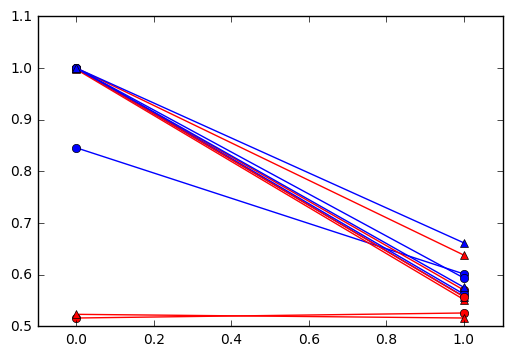

In [67]:
colors = ['r', 'b']
fmts = ['o-', '^-']

for iteration in iterations:
    for set_a in sets:
        for i in range(len(methods)):
            plt.plot([0, 1], accuracy[iteration-1, set_a-1, i, :], fmts[set_a-1], color=colors[i])
_ = plt.axis([-0.1, 1.1, 0.5, 1.1])

# Reproducibility

In [68]:
weights = [ [] for method in methods ]
for i, method in enumerate(methods):
    for iteration in iterations:
        for set_a in sets:
            dn_out = os.path.join(dn_output_base,
                    output_directory_name.format(method=method, set_a=set_a, iteration=iteration))
            fn_model = os.path.join(dn_out, '%s_Weights.csv' % method)
            weights[i].append(read_vector(fn_model))

In [69]:
corrs = [np.corrcoef(model) for model in weights]

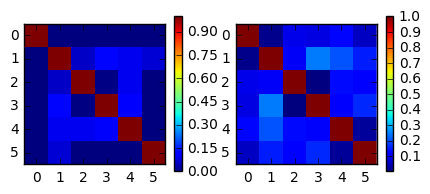

In [70]:
fig, subs = plt.subplots(nrows=1, ncols=len(methods), figsize=(5,2))
for i in range(len(methods)):
    plt.subplot(subs[i])
    plt.imshow(corrs[i], interpolation='none')
    plt.colorbar()

In [71]:
corrs

[array([[  1.00000000e+00,   9.09792715e-06,   5.59371432e-06,
           6.72253133e-06,   8.50466930e-06,  -1.87358160e-05],
        [  9.09792715e-06,   1.00000000e+00,   6.52059368e-02,
           1.32165182e-01,   1.00682157e-01,   7.77473928e-02],
        [  5.59371432e-06,   6.52059368e-02,   1.00000000e+00,
           7.34370926e-03,   9.87106713e-02,   7.09294884e-06],
        [  6.72253133e-06,   1.32165182e-01,   7.34370926e-03,
           1.00000000e+00,   1.21608203e-01,   8.52431285e-06],
        [  8.50466930e-06,   1.00682157e-01,   9.87106713e-02,
           1.21608203e-01,   1.00000000e+00,   1.07841017e-05],
        [ -1.87358160e-05,   7.77473928e-02,   7.09294884e-06,
           8.52431285e-06,   1.07841017e-05,   1.00000000e+00]]),
 array([[ 1.        ,  0.01553906,  0.09585386,  0.0893224 ,  0.13440243,
          0.06266763],
        [ 0.01553906,  1.        ,  0.10768683,  0.25030593,  0.20985932,
          0.15471283],
        [ 0.09585386,  0.10768683,  1.    

In [72]:
fn_nif1 = os.path.join(dn_output_base,
        output_directory_name.format(method='svm', set_a=1, iteration=1),
        'svm_Weights.nii.gz')

In [73]:
import nibabel as nib

In [74]:
from nilearn import plotting

In [75]:
img1 = nib.load(fn_nif1)

In [76]:
img2 = nib.load(fn_nif2)

In [77]:
fn_nif2 = os.path.join(dn_output_base,
        output_directory_name.format(method='svm', set_a=2, iteration=1),
        'svm_Weights.nii.gz')

# Compare Weight Maps from Different Sets

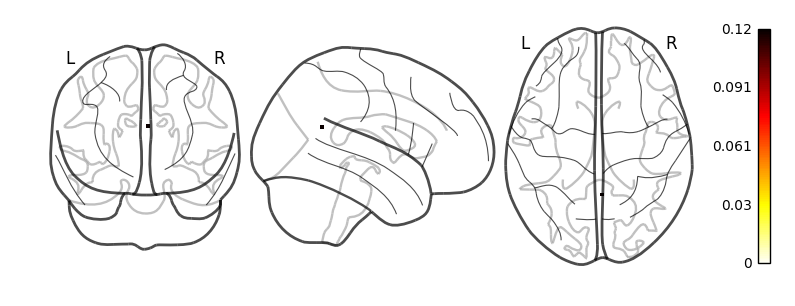

In [78]:
plotting.plot_glass_brain(img1,colorbar=True,plot_abs=False)

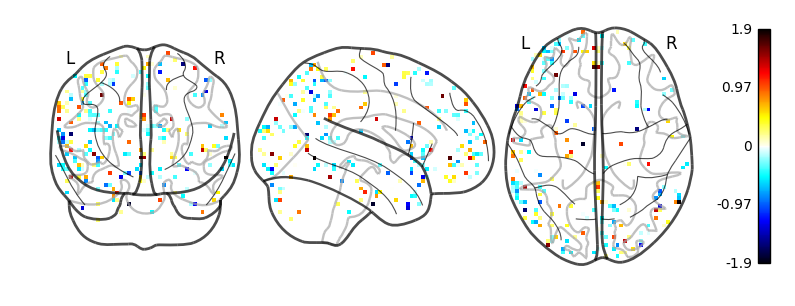

In [79]:
plotting.plot_glass_brain(img2,colorbar=True,plot_abs=False)